# Predictive Model For Collision Avoidance

## Our goal: predict collision before they occur


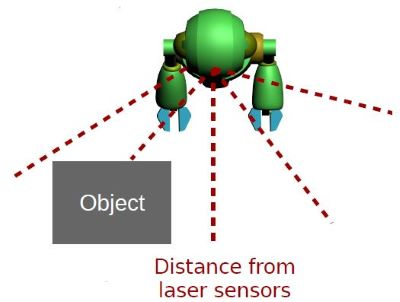

## Steps followed
1. Input to neural network: distance sensor values
2. Output of neural network: {collision, !collision}
3. Network output will be in the range [0..1]

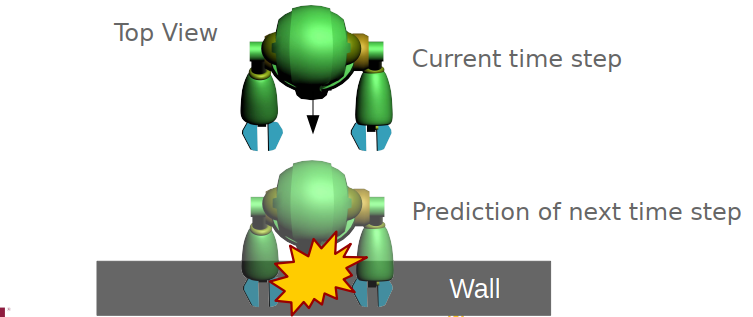

### Details:
1. The data is collected by simulating the behavior of the robot. The robot has six sensor values that depict the distance of the robot from the wall. The bot drives around randomly, sometimes bumping into the walls
2. For each event where the robot had a collision that particular data point is labeled as 1 or else it is labeled as 0.
3. We train a simple neural network to learn based on the distances (Tabular data)whether the robot will bum into the wall or not. 
4. The neural network consists of 6 inputs(sensors) it has 1 hidden layer with 200 neurons and 1 output node. 
5. This example was part of 'INTRODUCTION TO ROBOT LEARNINGHENIG' BEN AMOR, PH.D. at the ARIZONA STATE UNIVERSITY in cooperation with intel and can be found at https://www.intel.com/content/www/us/en/developer/learn/course-deep-learning-robotics.html

# Code

In [10]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import pdb
import numpy as np
from PreProcessing import PreprocessData
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


In [11]:
# Set Seeds For Randomness
torch.manual_seed(10)
np.random.seed(10)    
InputSize = 6  # Input Size
batch_size = 1 # Batch Size Of Neural Network
OutputSize = 1 # Output Size 
NumEpochs = 25 # Number of Epochs
HiddenSize = 200 # Number of hidden units

In [12]:
############################################# Network #####################################
class Net(nn.Module):
    def __init__(self, InputSize,OutputSize):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(InputSize, HiddenSize)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(HiddenSize, OutputSize)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [13]:
net = Net(InputSize, OutputSize)     

criterion = nn.MSELoss() 
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [14]:
def my_plot(epochs, loss):
    plt.plot(epochs, loss)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

In [15]:
loss_vals =  []    
TrainSize,SensorNNData,SensorNNLabels = PreprocessData()   

In [16]:
print(SensorNNData,SensorNNData.shape)


tensor([[100.0000, 100.0000, 100.0000, 100.0000, 100.0000,  49.0111],
        [100.0000,  28.0000,  16.0000,  45.0000,  23.0000, 276.3692],
        [ 87.0000,  66.0000,  51.0000,  16.0000,  25.0000, 132.9262],
        ...,
        [100.0000, 100.0000, 100.0000,  37.0000,   5.0000, 184.5135],
        [100.0000, 100.0000, 100.0000, 100.0000, 100.0000, 215.4532],
        [100.0000,  39.0000,  25.0000,  58.0000, 100.0000,  96.4605]]) torch.Size([18921, 6])


In [17]:
print(SensorNNLabels,SensorNNLabels.shape)

tensor([[0.],
        [1.],
        [1.],
        ...,
        [1.],
        [0.],
        [1.]]) torch.Size([18921, 1])


In [18]:
input_values = Variable(SensorNNData[1])
labels = Variable(SensorNNLabels[1])
outputs = net(input_values)


from torchviz import make_dot

make_dot(outputs, params=dict(list(net.named_parameters()))).render("rnn_torchviz", format="png")

'rnn_torchviz.png'

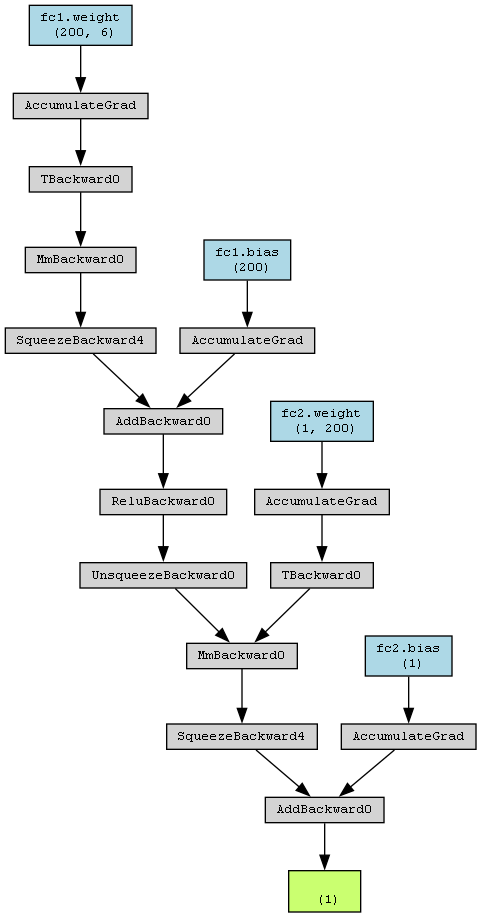

This program does three things:
 
1. Loads the sensor data collected and labels all the collision data as 1 and the rest of them as 0.
2. Creates a feedforward neural network and trains with labeled data up to 25 epochs. 
3. Stores the trained model as 'saved_nets/nn_bot_model.pkl'

In [19]:
for j in range(NumEpochs):
    losses = 0
    epoch_loss= []
    for i in range(TrainSize):  
        input_values = Variable(SensorNNData[i])
        labels = Variable(SensorNNLabels[i])
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = net(input_values)
        loss = criterion(outputs, labels)
        loss.backward()
        epoch_loss.append(loss.item())
        optimizer.step()
        losses += loss.item()
    loss_vals.append(sum(epoch_loss)/len(epoch_loss))

    print ('Epoch %d, Loss: %.4f' %(j+1, losses/SensorNNData.shape[0]))       
    torch.save(net.state_dict(), './SavedNets/NNBot.pkl')   

Epoch 1, Loss: 1.5457
Epoch 2, Loss: 0.1305
Epoch 3, Loss: 0.0278
Epoch 4, Loss: 0.0234
Epoch 5, Loss: 0.0218
Epoch 6, Loss: 0.0210
Epoch 7, Loss: 0.0207
Epoch 8, Loss: 0.0206
Epoch 9, Loss: 0.0205
Epoch 10, Loss: 0.0205
Epoch 11, Loss: 0.0204
Epoch 12, Loss: 0.0204
Epoch 13, Loss: 0.0204
Epoch 14, Loss: 0.0204
Epoch 15, Loss: 0.0203
Epoch 16, Loss: 0.0203
Epoch 17, Loss: 0.0202
Epoch 18, Loss: 0.0203
Epoch 19, Loss: 0.0204
Epoch 20, Loss: 0.0203
Epoch 21, Loss: 0.0204
Epoch 22, Loss: 0.0201
Epoch 23, Loss: 0.0204
Epoch 24, Loss: 0.0204
Epoch 25, Loss: 0.0204


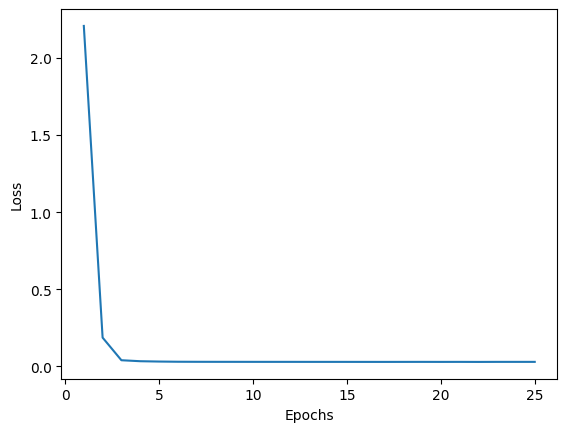

In [21]:
my_plot(np.linspace(1, NumEpochs, NumEpochs).astype(int), loss_vals)